In [1]:
from data_lib.data_lib import *

In [2]:
gests = read_data('data_full.csv')

In [3]:
gests_noise = get_noise(gests,0.5,10)

In [4]:
X, y = array_from_dict(gests, ndots=-1, gyro=False)

In [5]:
X_noise, y = array_from_dict(gests_noise, ndots=-1, gyro=False)

In [6]:
X = np.array([x[0] for x in X])
X_noise = np.array([x[0] for x in X_noise])

for ind in xrange(len(X_noise)):
    x = X_noise[ind][:,0]
    X_noise[ind][:,0] = (x-min(x))/(max(x)-min(x))
    y = X_noise[ind][:,1]
    X_noise[ind][:,1] = (y-min(y))/(max(y)-min(y))
    z = X_noise[ind][:,2]
    X_noise[ind][:,2] = (z-min(z))/(max(z)-min(z))

for ind in xrange(len(X)):
    x = X[ind][:,0]
    X[ind][:,0] = (x-min(x))/(max(x)-min(x))
    y = X[ind][:,1]
    X[ind][:,1] = (y-min(y))/(max(y)-min(y))
    z = X[ind][:,2]
    X[ind][:,2] = (z-min(z))/(max(z)-min(z))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from keras.models import Model
import numpy as np
from keras.layers import LSTM, Dense, Dropout, Activation, Reshape, Input

input_dim, latent_dim = 3, 20

input_img = Input(shape=(None, input_dim))
encoder = LSTM(activation="sigmoid", units=latent_dim, return_sequences=True)(input_img)
encoder = Dropout(0.2)(encoder)
decoder = LSTM(activation="sigmoid", units=input_dim, return_sequences=True)(encoder)
autoencoder = Model(input_img, decoder)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, X_noise_train, X_noise_test = train_test_split(X, X_noise, test_size=0.1)

batch_size = 0.1
n_epoch = 50

for i in range(n_epoch):
    _, X_noise_batch, _, X_batch = train_test_split(X_noise_train, X_train, test_size=batch_size)
    for seq_n, seq in zip(X_noise_batch, X_batch):
        autoencoder.fit(np.array([seq_n]), np.array([seq]), epochs=1, batch_size=1, verbose=0)
    scores = []
    for seq_n, seq in zip(X_noise_test, X_test):
        scores.append(autoencoder.evaluate(np.array([seq_n]), np.array([seq]), batch_size=1, verbose=0))
    print 'Trained on {}/{} samples. Validation loss: {}'.format(len(X_batch),len(X_train),np.mean(scores))

Trained on 132/1313 samples. Validation loss: 0.0814964523769
Trained on 132/1313 samples. Validation loss: 0.0801390981276
Trained on 132/1313 samples. Validation loss: 0.0788853141696
Trained on 132/1313 samples. Validation loss: 0.0783326665373
Trained on 132/1313 samples. Validation loss: 0.0770243722818
Trained on 132/1313 samples. Validation loss: 0.0753153341325
Trained on 132/1313 samples. Validation loss: 0.0737777760074
Trained on 132/1313 samples. Validation loss: 0.0720619363455
Trained on 132/1313 samples. Validation loss: 0.0698625530843
Trained on 132/1313 samples. Validation loss: 0.0677817683182
Trained on 132/1313 samples. Validation loss: 0.0654045578654
Trained on 132/1313 samples. Validation loss: 0.0622469168412
Trained on 132/1313 samples. Validation loss: 0.059656144477
Trained on 132/1313 samples. Validation loss: 0.0574227009632
Trained on 132/1313 samples. Validation loss: 0.0548584113944
Trained on 132/1313 samples. Validation loss: 0.0538649313815
Trained o

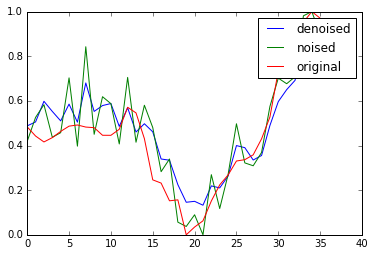

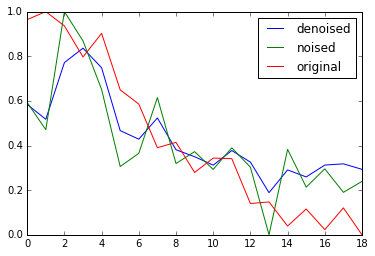

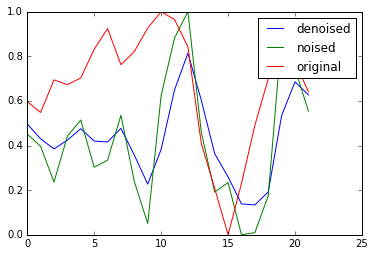

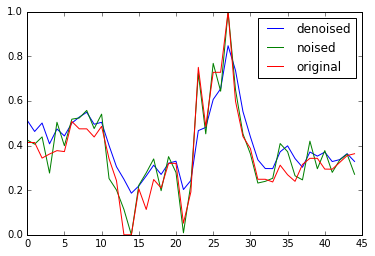

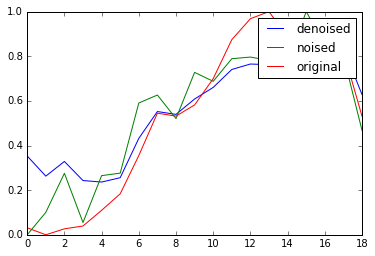

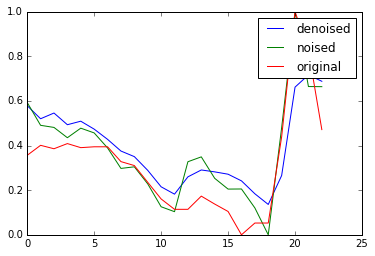

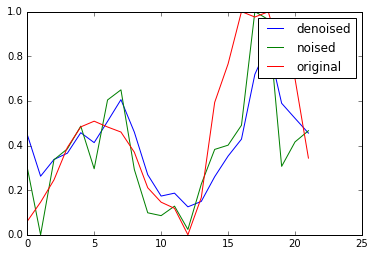

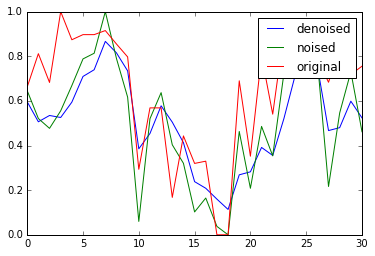

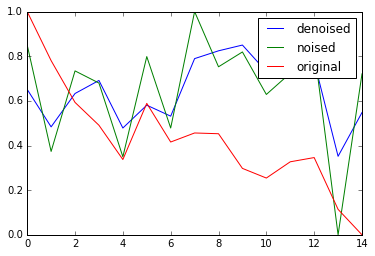

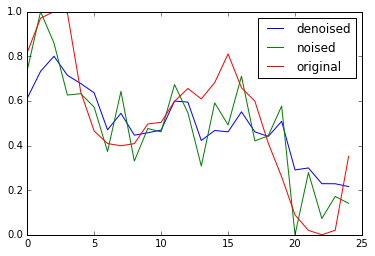

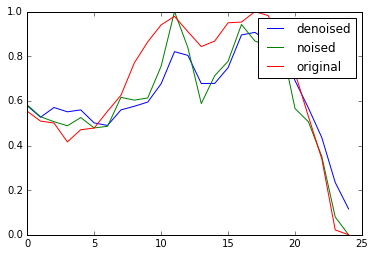

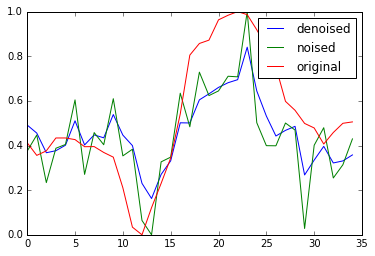

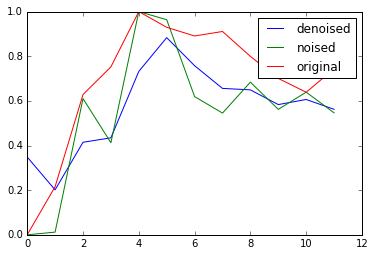

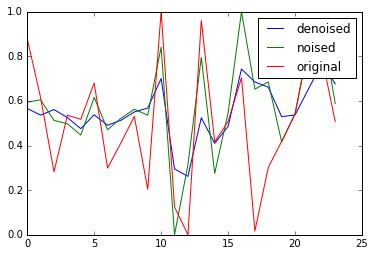

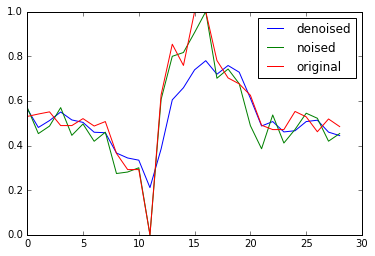

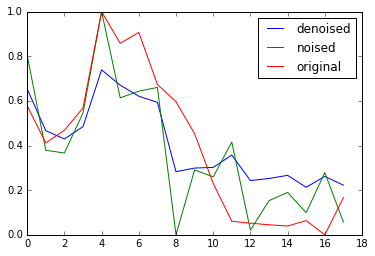

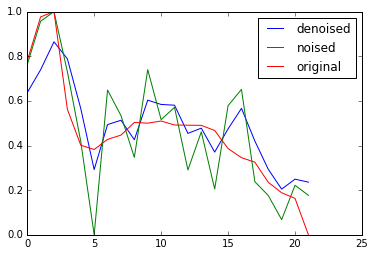

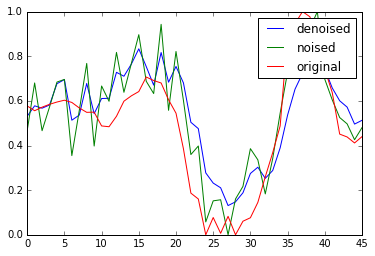

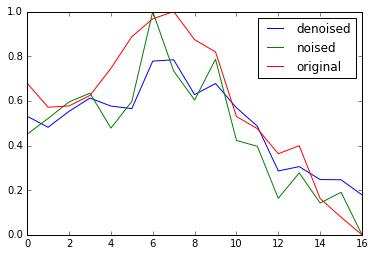

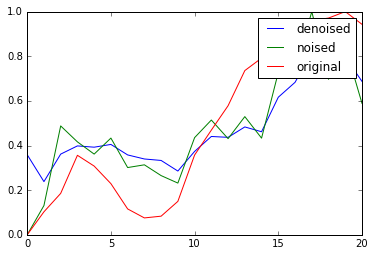

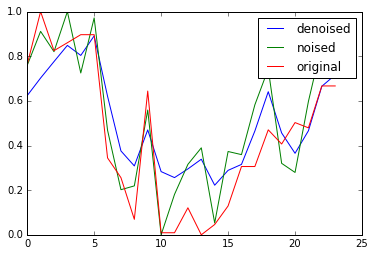

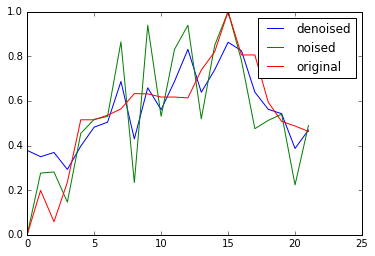

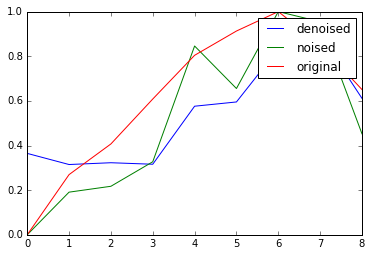

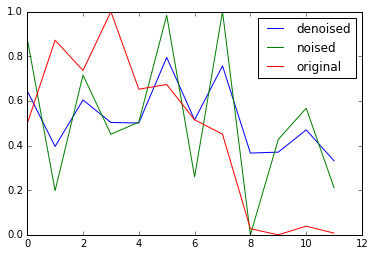

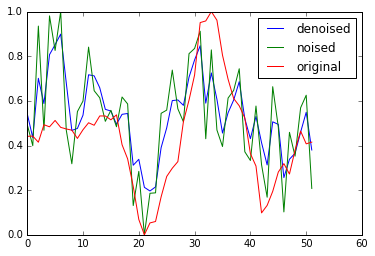

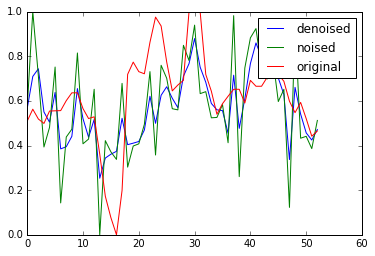

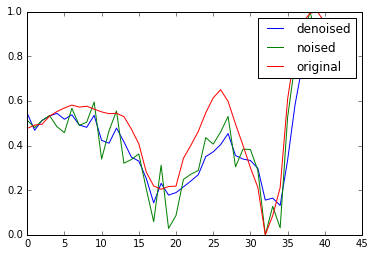

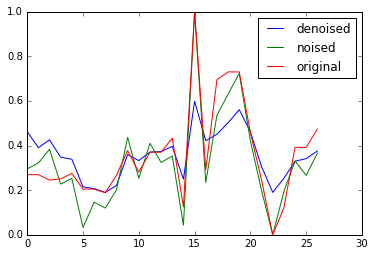

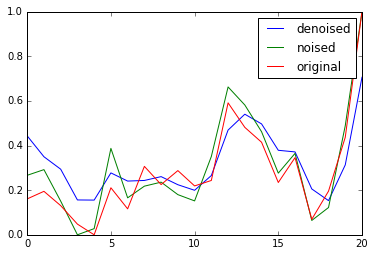

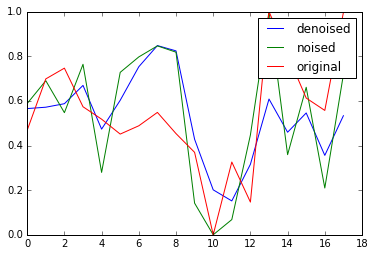

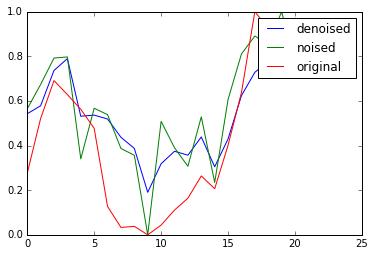

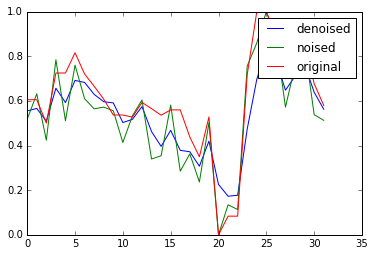

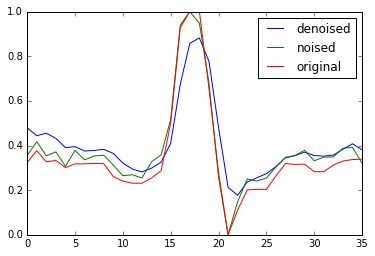

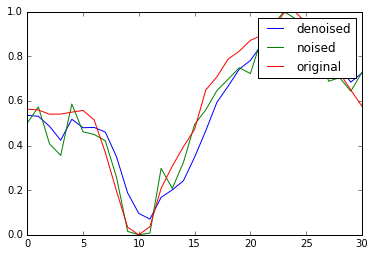

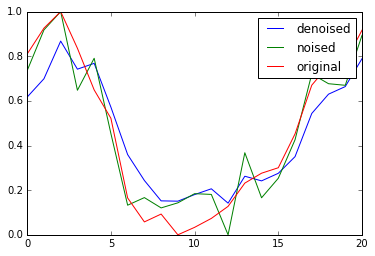

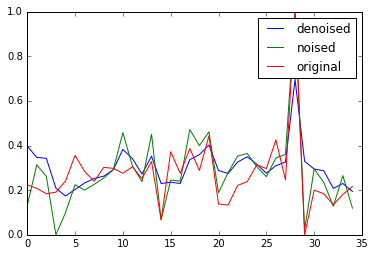

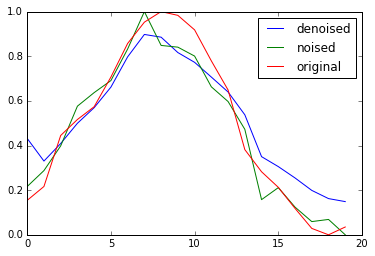

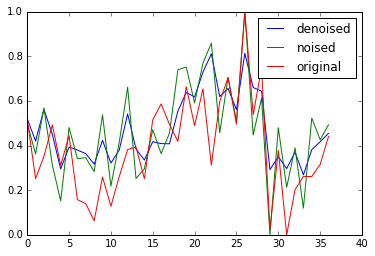

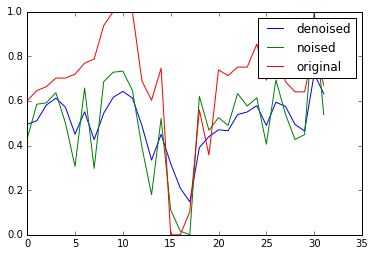

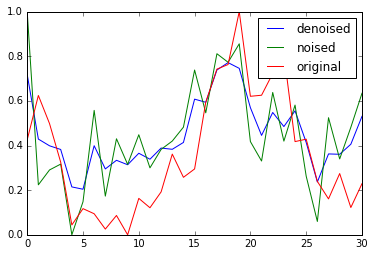

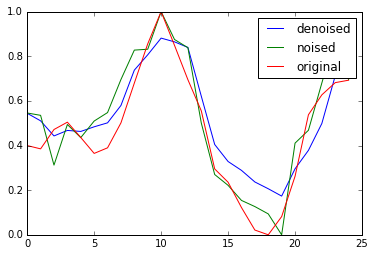

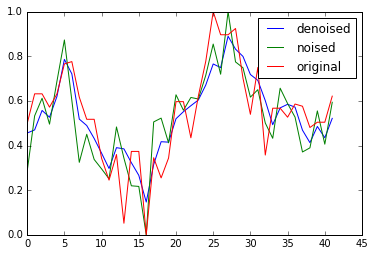

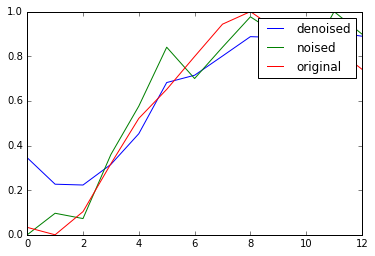

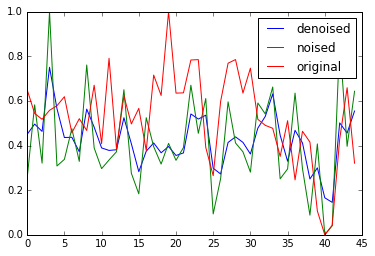

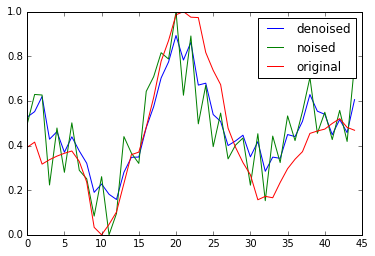

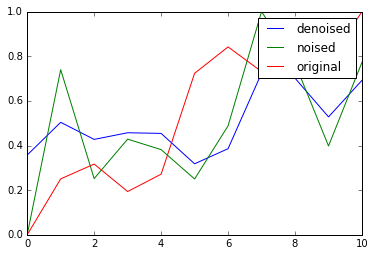

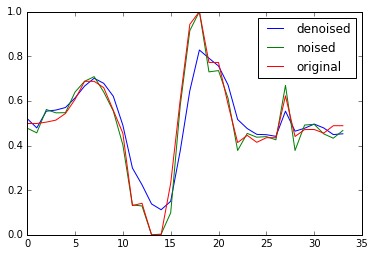

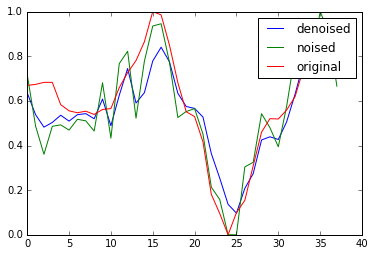

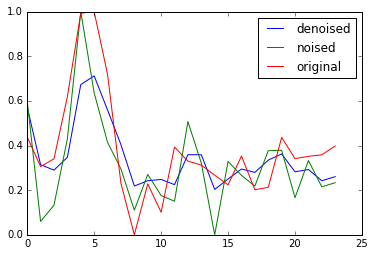

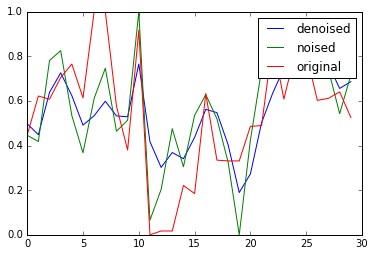

In [20]:
for _ in range(50):
    k = int(len(X)*np.random.random_sample())
    plt.plot([p[0] for p in autoencoder.predict(np.array([X_noise[k]]))[0]])
    plt.plot([p[0] for p in X_noise[k]])
    plt.plot([p[0] for p in X[k]])
    plt.legend(['denoised', 'noised', 'original'])
    plt.show()

In [18]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, 3)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 20)          1920      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 20)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 3)           288       
Total params: 2,208.0
Trainable params: 2,208.0
Non-trainable params: 0.0
_________________________________________________________________
None


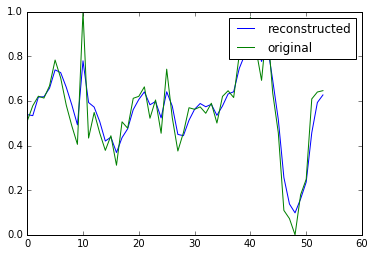

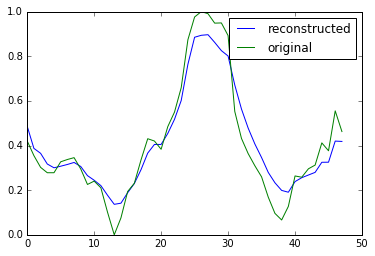

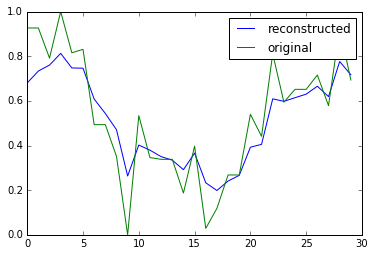

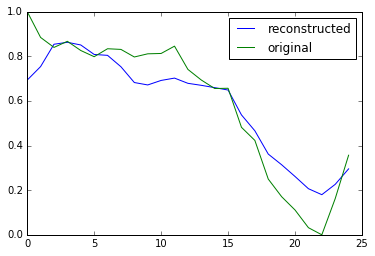

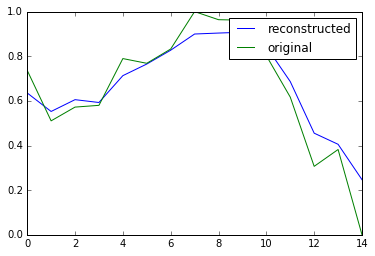

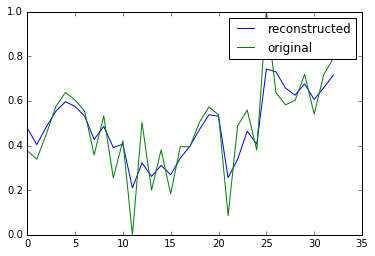

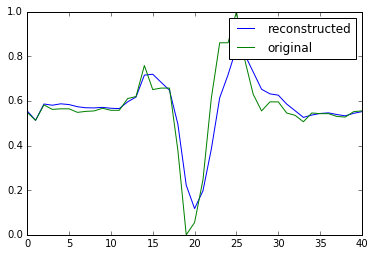

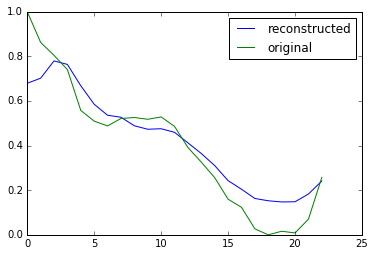

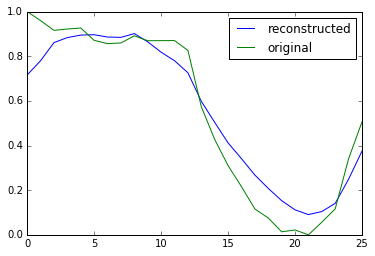

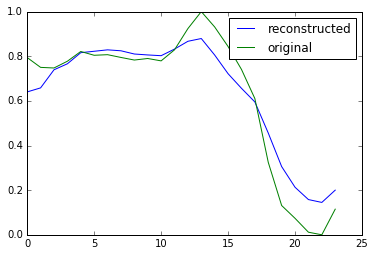

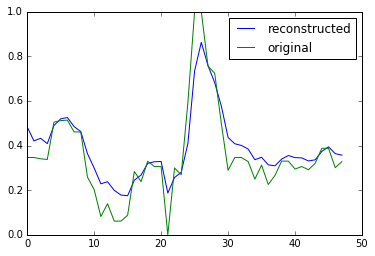

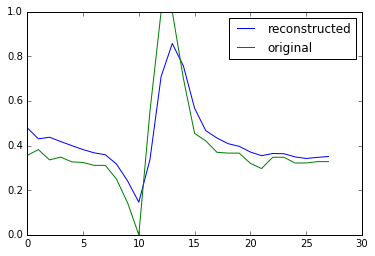

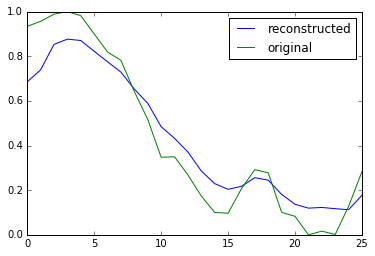

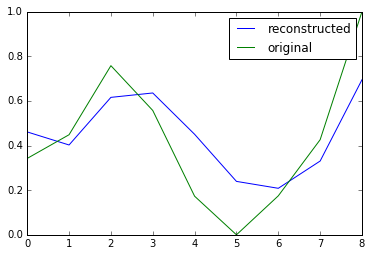

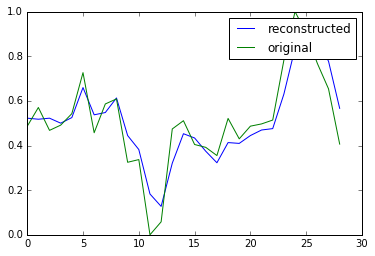

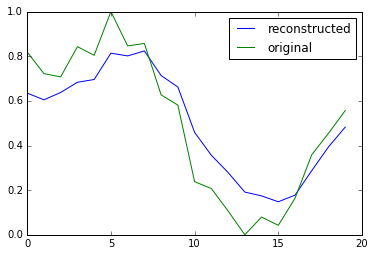

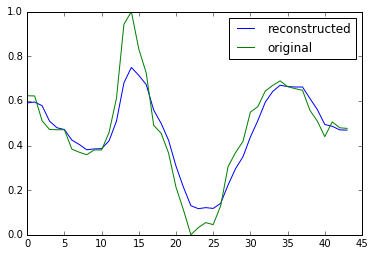

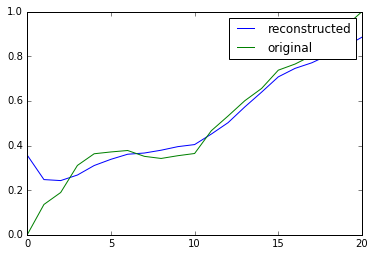

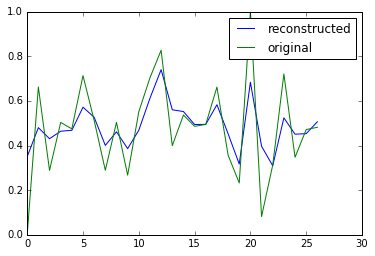

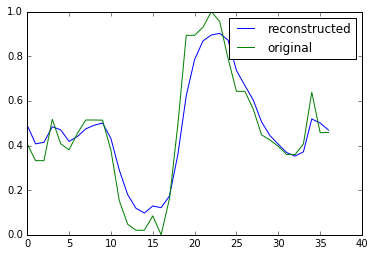

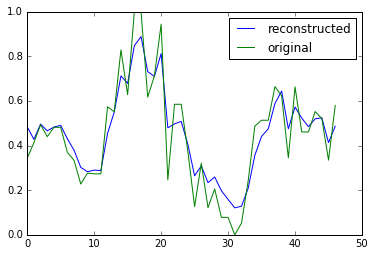

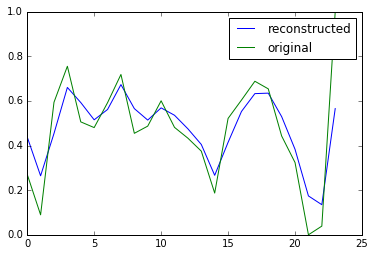

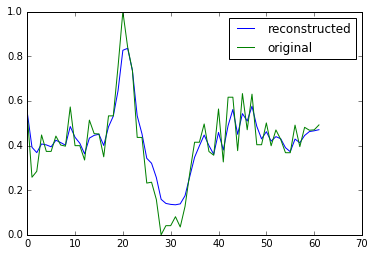

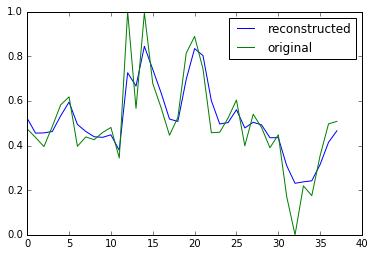

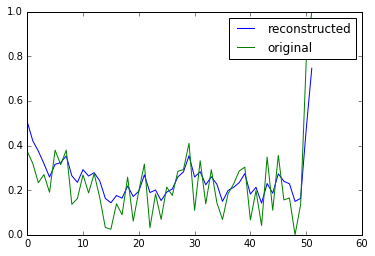

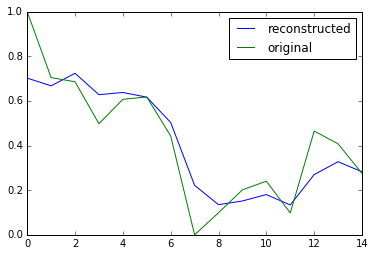

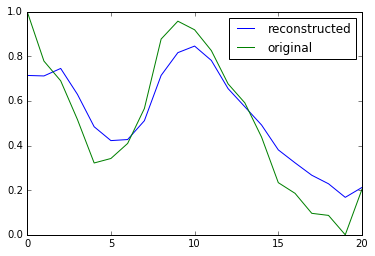

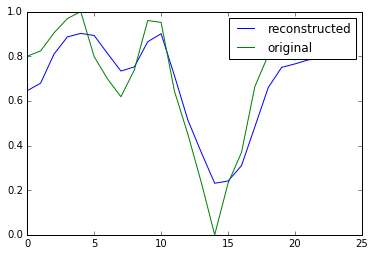

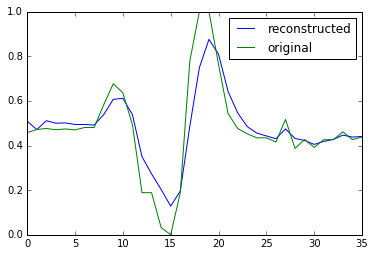

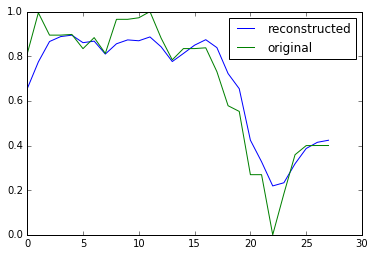

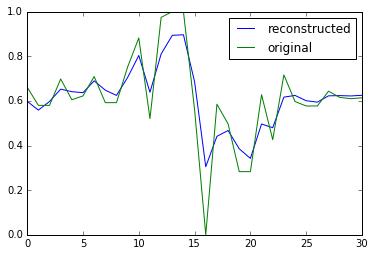

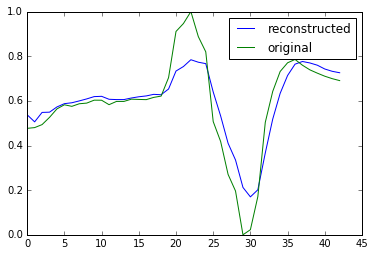

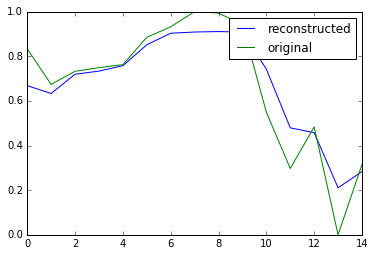

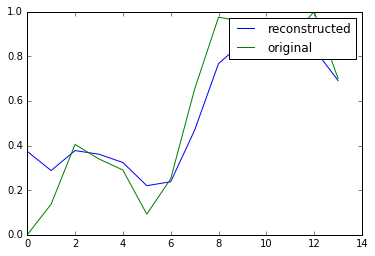

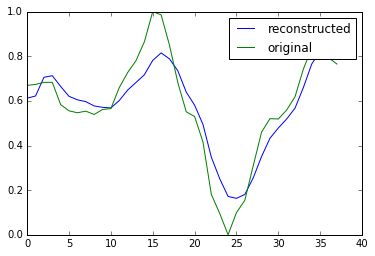

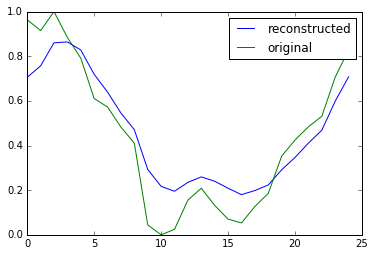

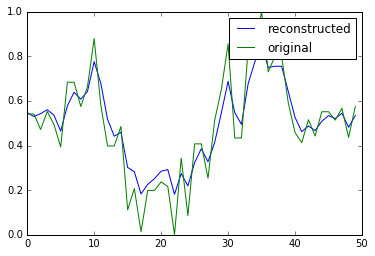

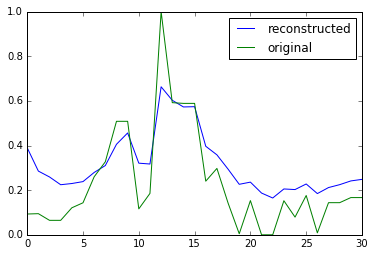

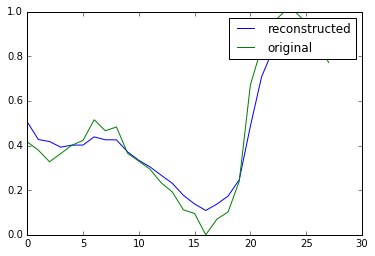

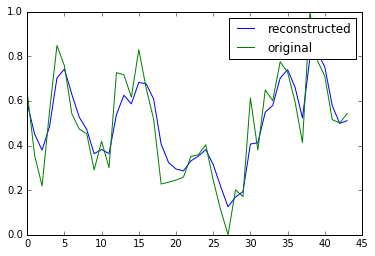

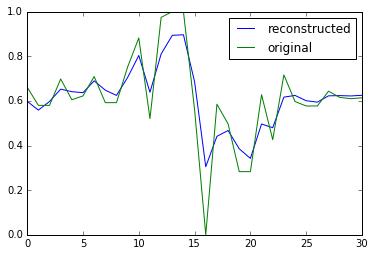

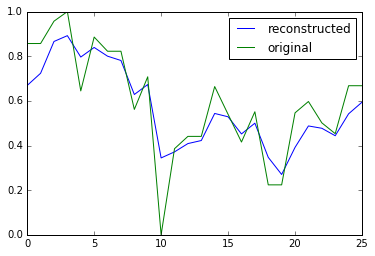

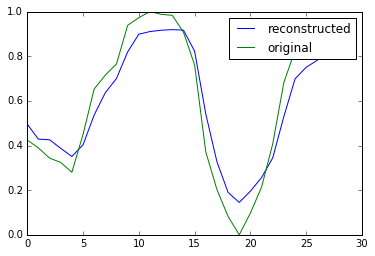

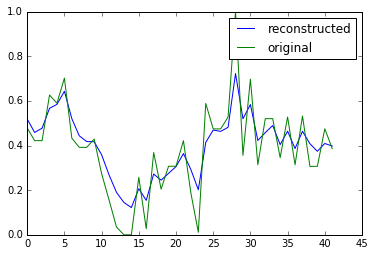

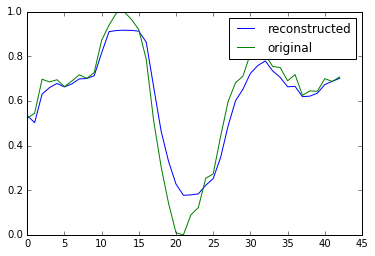

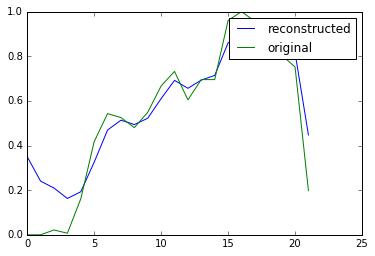

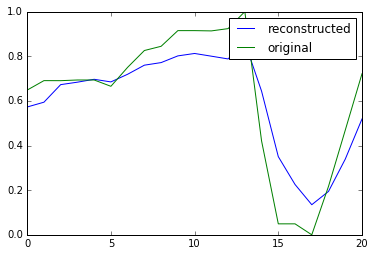

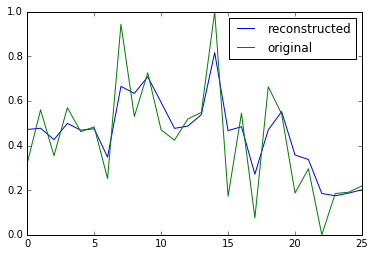

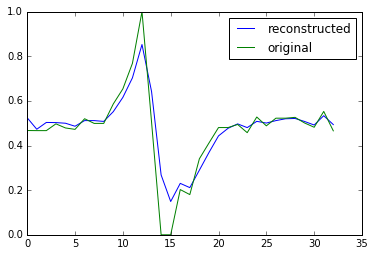

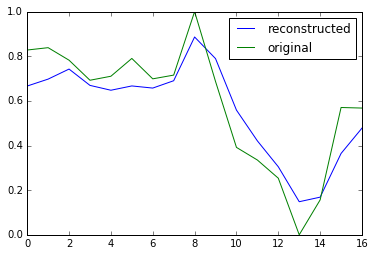

In [21]:
for _ in range(50):
    k = int(len(X)*np.random.random_sample())
    plt.plot([p[0] for p in autoencoder.predict(np.array([X[k]]))[0]])
    plt.plot([p[0] for p in X[k]])
    plt.legend(['reconstructed', 'original'])
    plt.show()